# Crocker and Grier tracking algorithm

First, import necessary library to load and display images

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pyrtrack import track
%matplotlib inline

Load a picture containing bright particles on a dark background and immediatly display this image in a figure

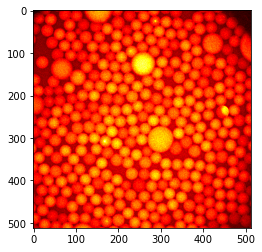

In [2]:
im = plt.imread('droplets.jpg')
plt.imshow(im, 'hot');
plt.show()

Create a finder object of the same shape as the image

In [3]:
finder = track.CrockerGrierFinder(im.shape)
finder?

Signature:     
finder(
    image,
    k=1.6,
    maxedge=-1,
    threshold=None,
    uniform_size=None,
    background=None,
)
Type:           CrockerGrierFinder
String form:    <pyrtrack.track.CrockerGrierFinder object at 0x7fa81163a220>
File:           ~/src/pyrtrack/pyrtrack/track.py
Docstring:      A single scale blob finder using Crocker & Grier algorithm
Init docstring: Allocate memory once
Call docstring:
Locate bright blobs in an image with subpixel resolution.
Returns an array of (x, y, intensity)


Feed the image in the finder with some tracking parameters. Output is an array of $(x,y,i)$ coordinates and intensities. Plot the resulting centers on the image. 
You can play on parameter $k$ that controls on which scale the image gets blurred before looking for local maxima. Here between 4 and 8 most of the particles are tracked. Large particles are either not detected or badly localised.

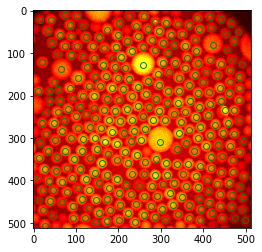

In [4]:
centers = finder(im,k=6)
plt.plot(centers[:,0], centers[:,1], 'o', mfc='none', mec='g');#display every center as a circle of arbitrary size
plt.imshow(im, 'hot');

The intermediate steps of the algorithm are accessible. For example the blurred version of the image is stored inside the finder object.

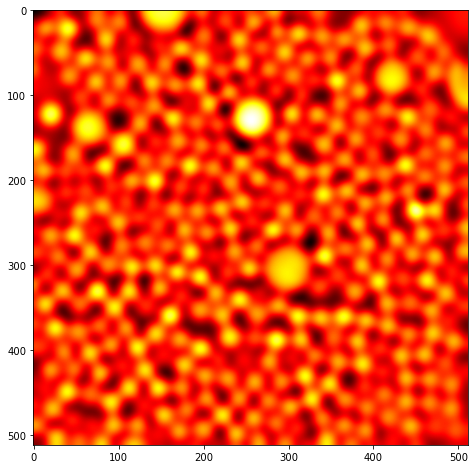

In [12]:
fig = plt.figure(figsize=(8,8))
plt.imshow(finder.blurred, 'hot');

One can also display the background that is substracted to the blurred image to enhance contrast. The tracking parameters that affect the background are 'background' (you provide an independently computed background) and 'uniform_size' that defines the size of the uniform filter used to compute the background. By default the background is computed from the image by a uniform filter of size $10\times k$.

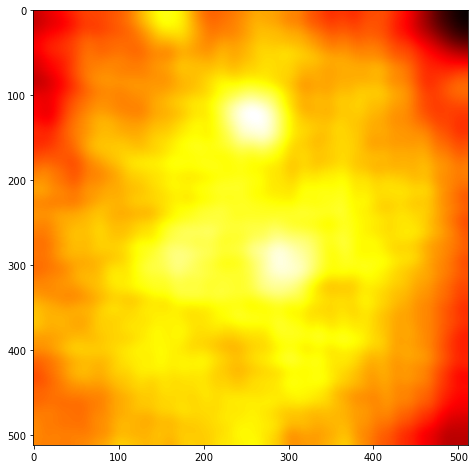

In [11]:
fig = plt.figure(figsize=(8,8))
plt.imshow(finder.background, 'hot');

Or the local maxima that were found

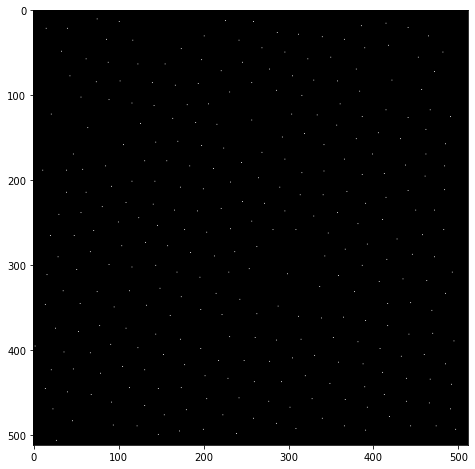

In [10]:
fig = plt.figure(figsize=(8,8))
plt.imshow(finder.binary, 'gray');